<a href="https://colab.research.google.com/github/shkim0116/Lecture-Recommendation-NLP/blob/main/labeling/labeling_w2v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 늘리기

In [ ]:
! pip install konlpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
data_cat = pd.read_csv("/content/drive/Shareddrives/NLP모델링/labeling - labeling (1).csv", encoding='cp949')

In [ ]:
data_cat

,Unnamed: 0,강의명/교수명,강의평,"성적 (너그러움 1, 보통 null, 깐깐함 0)","로드 (쉬우면 1, 빡세면 0, 애매하면 null)","강의력 (좋으면 1, 나쁘면 0)","교수님성향 (좋으면 1, 안 좋으면 0)",족보여부,강의자료질
0,1,대학기본영어Ⅱ/오진숙,22,1.0,NaN,NaN,1.0,0.0,NaN
1,2,대학영어Ⅰ/브룩스잉글리쉬그레고리,70,1.0,0.0,NaN,NaN,0.0,NaN
2,3,대학영어Ⅱ/전진희,43,NaN,NaN,0.0,NaN,0.0,NaN
3,4,대학영어Ⅱ/오진숙,73,1.0,NaN,NaN,1.0,0.0,NaN
4,6,고급대학영어Ⅱ/롱마이클,103,1.0,NaN,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
381,1240,교육철학및교육사/이성미,35,1.0,NaN,1.0,1.0,0.0,NaN
382,1244,교육심리/김정민,60,1.0,NaN,1.0,1.0,0.0,NaN
383,1248,특수교육학개론/김지영,68,1.0,1.0,1.0,1.0,0.0,NaN
384,1251,학교폭력예방및학생의이해/서정기,21,NaN,NaN,NaN,NaN,0.0,NaN


In [ ]:
import os

path = '/content/drive/Shareddrives/NLP모델링/강의평 데이터/크롤링 통합'
file_list = os.listdir(path)

In [ ]:
df = pd.DataFrame()
for i in file_list:
    data = pd.read_csv(path+ '/' + i)
    df = pd.concat([df,data])
    
review = df.reset_index(drop = True)

In [ ]:
review = review.drop_duplicates(keep = 'first')

In [ ]:
review

,학정번호,강의명,교수명,유의사항,별점,수강시기,강의평
0,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",4.0,19년 1학기,과제는 자잘하게 많이 내주시지만 큰 시간이 소요된다는 생각을 해본적은 없음. 수업 ...
1,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",3.0,19년 1학기,과제가 진짜 일주일에 두번씩 있음\n어려운건 아닌데 나처럼 귀찮아하다가 한두개 안해...
2,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",3.0,19년 1학기,잔 과제가 많고 쪽지 시험도 많다. 그리고 되게 꼼꼼하셔서 그냥 숙제로 해 오는 받...
3,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",5.0,19년 1학기,프롶 진희전 . 처음엔 되게 깐깐할 것 같았는데 나름의 인간적 면모도 보여주시고 좋...
4,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",3.0,19년 1학기,수업은 간단한데 과제가 매우 많음 과제는 쉬운편\n시험이랑 퀴즈는 교재 외우면 됨\...
...,...,...,...,...,...,...,...
34933,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,대학이라기보다는 대학원 수업같은느낌\n초반에는 교수님위주로 하시다가 학생들 발표로 ...
34934,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,아무것도 안하고 아무것도 안배우는 수업입니다. 발표 한번 하면 끝이에요 주제도 본인...
34935,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",2.0,17년 1학기,학점은 겁나 잘 주시는데 그게 끝.. 뭐 학점 잘 주면 좋은 교수님이라는 생각이 학...
34936,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 1학기,출석 잘하고 발표 딱 한번만 하면 에이쁠 가능 ㅎㅎ 발표 잘하는 사람에게 딱 좋은 ...


In [ ]:
review_copy = review.copy()
review_copy['강의명/교수명'] = review_copy['강의명']+'/'+review_copy['교수명']
review_copy.head()

,학정번호,강의명,교수명,유의사항,별점,수강시기,강의평,강의명/교수명
0,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",4.0,19년 1학기,과제는 자잘하게 많이 내주시지만 큰 시간이 소요된다는 생각을 해본적은 없음. 수업 ...,대학기본영어Ⅰ/전진희
1,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",3.0,19년 1학기,과제가 진짜 일주일에 두번씩 있음\n어려운건 아닌데 나처럼 귀찮아하다가 한두개 안해...,대학기본영어Ⅰ/전진희
2,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",3.0,19년 1학기,잔 과제가 많고 쪽지 시험도 많다. 그리고 되게 꼼꼼하셔서 그냥 숙제로 해 오는 받...,대학기본영어Ⅰ/전진희
3,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",5.0,19년 1학기,프롶 진희전 . 처음엔 되게 깐깐할 것 같았는데 나름의 인간적 면모도 보여주시고 좋...,대학기본영어Ⅰ/전진희
4,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",3.0,19년 1학기,수업은 간단한데 과제가 매우 많음 과제는 쉬운편\n시험이랑 퀴즈는 교재 외우면 됨\...,대학기본영어Ⅰ/전진희


성적 (너그러움 1, 보통 null, 깐깐함 0)	로드 (쉬우면 1, 빡세면 0, 애매하면 null)	강의력 (좋으면 1, 나쁘면 0)	교수님성향 (좋으면 1, 안 좋으면 0)	족보여부	강의자료질

In [ ]:
data_cat.rename(columns = {'성적 (너그러움 1, 보통 null, 깐깐함 0)':'성적','로드 (쉬우면 1, 빡세면 0, 애매하면 null)':'로드'},inplace=True)

In [ ]:
data_cat.rename(columns = {'강의력 (좋으면 1, 나쁘면 0)':'강의력','교수님성향 (좋으면 1, 안 좋으면 0)':'교수님성향'},inplace=True)

In [ ]:
data_cat = data_cat.drop(['Unnamed: 0'],axis=1)

In [ ]:
data_cat

,강의명/교수명,강의평,성적,로드,강의력,교수님성향,족보여부,강의자료질
0,대학기본영어Ⅱ/오진숙,22,1.0,NaN,NaN,1.0,0.0,NaN
1,대학영어Ⅰ/브룩스잉글리쉬그레고리,70,1.0,0.0,NaN,NaN,0.0,NaN
2,대학영어Ⅱ/전진희,43,NaN,NaN,0.0,NaN,0.0,NaN
3,대학영어Ⅱ/오진숙,73,1.0,NaN,NaN,1.0,0.0,NaN
4,고급대학영어Ⅱ/롱마이클,103,1.0,NaN,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
381,교육철학및교육사/이성미,35,1.0,NaN,1.0,1.0,0.0,NaN
382,교육심리/김정민,60,1.0,NaN,1.0,1.0,0.0,NaN
383,특수교육학개론/김지영,68,1.0,1.0,1.0,1.0,0.0,NaN
384,학교폭력예방및학생의이해/서정기,21,NaN,NaN,NaN,NaN,0.0,NaN


### 관련 리뷰 찾기 (단어 포함여부)

In [ ]:
word_성적 =  ["시험", "학점", "성적", "셤","점수","A", "B", "C", "a", "b", "c", "에이", "결과", "마이너스","비율", "쁠," "만점", "절평","에마", "등수", "기준", "컷", "만회"]
word_로드	= ["로드", "과제", "시험", "셤", "시간", "조별", "팀플", "조모임", "공부량", "부담", "노력", "숙제", "보고서", "레포트", "페이퍼", "퀴즈", "쪽글", "프로젝트", "에세이", "리포트", "감상문", "자잘", "활동", "발표"]
word_강의력	= ["교수", "수업", "이해", "유익", "강의력", "퀄리티", "설명", "이해","가르치"]
word_교수님성향	= ["성격", "성향", "교수", "겨수", "성품", "선생님", "강사", "열정", "천사"]
word_족보여부	= ["족보", "기출", "답지"]
word_강의자료질 = ["자료", "영상", "피피티", "ppt", "프린트", "교과서", "유튜브", "슬라이드", "파일", "참고자료", "판서", "컨텐츠", "콘텐츠", "교재"]

In [ ]:
review_copy

,학정번호,강의명,교수명,유의사항,별점,수강시기,강의평,강의명/교수명
0,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",4.0,19년 1학기,과제는 자잘하게 많이 내주시지만 큰 시간이 소요된다는 생각을 해본적은 없음. 수업 ...,대학기본영어Ⅰ/전진희
1,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",3.0,19년 1학기,과제가 진짜 일주일에 두번씩 있음\n어려운건 아닌데 나처럼 귀찮아하다가 한두개 안해...,대학기본영어Ⅰ/전진희
2,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",3.0,19년 1학기,잔 과제가 많고 쪽지 시험도 많다. 그리고 되게 꼼꼼하셔서 그냥 숙제로 해 오는 받...,대학기본영어Ⅰ/전진희
3,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",5.0,19년 1학기,프롶 진희전 . 처음엔 되게 깐깐할 것 같았는데 나름의 인간적 면모도 보여주시고 좋...,대학기본영어Ⅰ/전진희
4,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",3.0,19년 1학기,수업은 간단한데 과제가 매우 많음 과제는 쉬운편\n시험이랑 퀴즈는 교재 외우면 됨\...,대학기본영어Ⅰ/전진희
...,...,...,...,...,...,...,...,...
34933,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,대학이라기보다는 대학원 수업같은느낌\n초반에는 교수님위주로 하시다가 학생들 발표로 ...,학교폭력예방및학생의이해/류부열
34934,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,아무것도 안하고 아무것도 안배우는 수업입니다. 발표 한번 하면 끝이에요 주제도 본인...,학교폭력예방및학생의이해/류부열
34935,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",2.0,17년 1학기,학점은 겁나 잘 주시는데 그게 끝.. 뭐 학점 잘 주면 좋은 교수님이라는 생각이 학...,학교폭력예방및학생의이해/류부열
34936,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 1학기,출석 잘하고 발표 딱 한번만 하면 에이쁠 가능 ㅎㅎ 발표 잘하는 사람에게 딱 좋은 ...,학교폭력예방및학생의이해/류부열


In [ ]:
for i in review_copy.index:
  if any(word in review_copy.loc[i].강의평 for word in word_성적) : 
    review_copy.loc[i,'성적'] = 'Y'
  if any(word in review_copy.loc[i].강의평 for word in word_로드) : 
    review_copy.loc[i,'로드'] = 'Y'
  if any(word in review_copy.loc[i].강의평 for word in word_강의력) : 
    review_copy.loc[i,'강의력'] = 'Y'
  if any(word in review_copy.loc[i].강의평 for word in word_교수님성향) : 
    review_copy.loc[i,'교수님성향'] = 'Y'
  if any(word in review_copy.loc[i].강의평 for word in word_족보여부) : 
    review_copy.loc[i,'족보여부'] = 'Y'
  if any(word in review_copy.loc[i].강의평 for word in word_강의자료질) : 
    review_copy.loc[i,'강의자료질'] = 'Y'

In [ ]:
review_copy

,학정번호,강의명,교수명,유의사항,별점,수강시기,강의평,강의명/교수명,성적,로드,강의력,교수님성향,강의자료질,족보여부
0,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",4.0,19년 1학기,과제는 자잘하게 많이 내주시지만 큰 시간이 소요된다는 생각을 해본적은 없음. 수업 ...,대학기본영어Ⅰ/전진희,Y,Y,Y,NaN,NaN,NaN
1,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",3.0,19년 1학기,과제가 진짜 일주일에 두번씩 있음\n어려운건 아닌데 나처럼 귀찮아하다가 한두개 안해...,대학기본영어Ⅰ/전진희,Y,Y,NaN,NaN,NaN,NaN
2,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",3.0,19년 1학기,잔 과제가 많고 쪽지 시험도 많다. 그리고 되게 꼼꼼하셔서 그냥 숙제로 해 오는 받...,대학기본영어Ⅰ/전진희,Y,Y,Y,Y,NaN,NaN
3,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",5.0,19년 1학기,프롶 진희전 . 처음엔 되게 깐깐할 것 같았는데 나름의 인간적 면모도 보여주시고 좋...,대학기본영어Ⅰ/전진희,Y,Y,Y,NaN,Y,NaN
4,YCC1001-01-00,대학기본영어Ⅰ,전진희,"대면강의, 절대평가",3.0,19년 1학기,수업은 간단한데 과제가 매우 많음 과제는 쉬운편\n시험이랑 퀴즈는 교재 외우면 됨\...,대학기본영어Ⅰ/전진희,Y,Y,Y,NaN,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34933,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,대학이라기보다는 대학원 수업같은느낌\n초반에는 교수님위주로 하시다가 학생들 발표로 ...,학교폭력예방및학생의이해/류부열,NaN,Y,Y,Y,NaN,NaN
34934,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,아무것도 안하고 아무것도 안배우는 수업입니다. 발표 한번 하면 끝이에요 주제도 본인...,학교폭력예방및학생의이해/류부열,Y,Y,Y,NaN,NaN,NaN
34935,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",2.0,17년 1학기,학점은 겁나 잘 주시는데 그게 끝.. 뭐 학점 잘 주면 좋은 교수님이라는 생각이 학...,학교폭력예방및학생의이해/류부열,Y,Y,Y,Y,Y,NaN
34936,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 1학기,출석 잘하고 발표 딱 한번만 하면 에이쁠 가능 ㅎㅎ 발표 잘하는 사람에게 딱 좋은 ...,학교폭력예방및학생의이해/류부열,Y,Y,Y,Y,NaN,NaN


In [ ]:
review_copy.isnull().sum()

학정번호           0
강의명            0
교수명            0
유의사항          76
별점             0
수강시기           0
강의평            0
강의명/교수명        0
성적         10542
로드         11089
강의력         7768
교수님성향      15321
강의자료질      27196
족보여부       31399
dtype: int64

In [ ]:
review20 = review_copy[review_copy["강의명/교수명"].isin(name_lst)]

In [ ]:
review20

,학정번호,강의명,교수명,유의사항,별점,수강시기,강의평,강의명/교수명,성적,로드,강의력,교수님성향,강의자료질,족보여부
15,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,17년 2학기,어렵지 않은 내용으로 탄탄한 기본기를 다져주는 유익한 수업,대학기본영어Ⅱ/오진숙,NaN,NaN,Y,NaN,NaN,NaN
16,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,교수님 너무 귀여우심... 사랑해요\n자잘한 과제들 귀찮긴 했지만 시간투자 그렇게 ...,대학기본영어Ⅱ/오진숙,NaN,Y,Y,Y,NaN,NaN
17,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,완전 좋음 2학기 때 내가 살아있던 이유.. 기말 때 갑자기 시험을 세번 본 거는 ...,대학기본영어Ⅱ/오진숙,Y,Y,Y,Y,NaN,NaN
18,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",4.0,19년 2학기,영어 말하는 데에 자신감을 얻고 싶으면 추천 다만 과제는 자잘한게 많고 필자는 1학...,대학기본영어Ⅱ/오진숙,Y,Y,Y,Y,NaN,NaN
19,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,16년 2학기,수강당시에는 조모임 비율도 높았고 발음 중시하시는건 왜 그러시는지 잘 이해가지 않지...,대학기본영어Ⅱ/오진숙,Y,Y,Y,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34933,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,대학이라기보다는 대학원 수업같은느낌\n초반에는 교수님위주로 하시다가 학생들 발표로 ...,학교폭력예방및학생의이해/류부열,NaN,Y,Y,Y,NaN,NaN
34934,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,아무것도 안하고 아무것도 안배우는 수업입니다. 발표 한번 하면 끝이에요 주제도 본인...,학교폭력예방및학생의이해/류부열,Y,Y,Y,NaN,NaN,NaN
34935,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",2.0,17년 1학기,학점은 겁나 잘 주시는데 그게 끝.. 뭐 학점 잘 주면 좋은 교수님이라는 생각이 학...,학교폭력예방및학생의이해/류부열,Y,Y,Y,Y,Y,NaN
34936,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 1학기,출석 잘하고 발표 딱 한번만 하면 에이쁠 가능 ㅎㅎ 발표 잘하는 사람에게 딱 좋은 ...,학교폭력예방및학생의이해/류부열,Y,Y,Y,Y,NaN,NaN


In [ ]:
review20.isnull().sum()

학정번호           0
강의명            0
교수명            0
유의사항          22
별점             0
수강시기           0
강의평            0
강의명/교수명        0
성적          8470
로드          9207
강의력         6536
교수님성향      12908
강의자료질      22265
족보여부       25620
dtype: int64

In [ ]:
# review20.to_csv("/content/drive/MyDrive/NLP모델링/related_reviews.csv")

In [ ]:
data_cat

,강의명/교수명,강의평,성적,로드,강의력,교수님성향,족보여부,강의자료질
0,대학기본영어Ⅱ/오진숙,22,1.0,NaN,NaN,1.0,0.0,NaN
1,대학영어Ⅰ/브룩스잉글리쉬그레고리,70,1.0,0.0,NaN,NaN,0.0,NaN
2,대학영어Ⅱ/전진희,43,NaN,NaN,0.0,NaN,0.0,NaN
3,대학영어Ⅱ/오진숙,73,1.0,NaN,NaN,1.0,0.0,NaN
4,고급대학영어Ⅱ/롱마이클,103,1.0,NaN,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
381,교육철학및교육사/이성미,35,1.0,NaN,1.0,1.0,0.0,NaN
382,교육심리/김정민,60,1.0,NaN,1.0,1.0,0.0,NaN
383,특수교육학개론/김지영,68,1.0,1.0,1.0,1.0,0.0,NaN
384,학교폭력예방및학생의이해/서정기,21,NaN,NaN,NaN,NaN,0.0,NaN


In [ ]:
review20

,학정번호,강의명,교수명,유의사항,별점,수강시기,강의평,강의명/교수명,성적,로드,강의력,교수님성향,강의자료질,족보여부
15,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,17년 2학기,어렵지 않은 내용으로 탄탄한 기본기를 다져주는 유익한 수업,대학기본영어Ⅱ/오진숙,NaN,NaN,Y,NaN,NaN,NaN
16,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,교수님 너무 귀여우심... 사랑해요\n자잘한 과제들 귀찮긴 했지만 시간투자 그렇게 ...,대학기본영어Ⅱ/오진숙,NaN,Y,Y,Y,NaN,NaN
17,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,완전 좋음 2학기 때 내가 살아있던 이유.. 기말 때 갑자기 시험을 세번 본 거는 ...,대학기본영어Ⅱ/오진숙,Y,Y,Y,Y,NaN,NaN
18,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",4.0,19년 2학기,영어 말하는 데에 자신감을 얻고 싶으면 추천 다만 과제는 자잘한게 많고 필자는 1학...,대학기본영어Ⅱ/오진숙,Y,Y,Y,Y,NaN,NaN
19,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,16년 2학기,수강당시에는 조모임 비율도 높았고 발음 중시하시는건 왜 그러시는지 잘 이해가지 않지...,대학기본영어Ⅱ/오진숙,Y,Y,Y,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34933,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,대학이라기보다는 대학원 수업같은느낌\n초반에는 교수님위주로 하시다가 학생들 발표로 ...,학교폭력예방및학생의이해/류부열,NaN,Y,Y,Y,NaN,NaN
34934,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,아무것도 안하고 아무것도 안배우는 수업입니다. 발표 한번 하면 끝이에요 주제도 본인...,학교폭력예방및학생의이해/류부열,Y,Y,Y,NaN,NaN,NaN
34935,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",2.0,17년 1학기,학점은 겁나 잘 주시는데 그게 끝.. 뭐 학점 잘 주면 좋은 교수님이라는 생각이 학...,학교폭력예방및학생의이해/류부열,Y,Y,Y,Y,Y,NaN
34936,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 1학기,출석 잘하고 발표 딱 한번만 하면 에이쁠 가능 ㅎㅎ 발표 잘하는 사람에게 딱 좋은 ...,학교폭력예방및학생의이해/류부열,Y,Y,Y,Y,NaN,NaN


In [ ]:
(data_cat.loc[data_cat['강의명/교수명']==title,'성적'].isnull()).bool()

False

In [ ]:
i = 17
title = review20.loc[i,'강의명/교수명']
if review20.loc[i,'성적'] == 'Y': 
  if not (data_cat.loc[data_cat['강의명/교수명']==title,'성적'].isnull()).bool():
    review20.loc[i,'성적'] = int(data_cat.loc[data_cat['강의명/교수명']==title,'성적'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
review20

,학정번호,강의명,교수명,유의사항,별점,수강시기,강의평,강의명/교수명,성적,로드,강의력,교수님성향,강의자료질,족보여부
15,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,17년 2학기,어렵지 않은 내용으로 탄탄한 기본기를 다져주는 유익한 수업,대학기본영어Ⅱ/오진숙,NaN,NaN,Y,NaN,NaN,NaN
16,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,교수님 너무 귀여우심... 사랑해요\n자잘한 과제들 귀찮긴 했지만 시간투자 그렇게 ...,대학기본영어Ⅱ/오진숙,NaN,Y,Y,Y,NaN,NaN
17,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,완전 좋음 2학기 때 내가 살아있던 이유.. 기말 때 갑자기 시험을 세번 본 거는 ...,대학기본영어Ⅱ/오진숙,1,Y,Y,Y,NaN,NaN
18,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",4.0,19년 2학기,영어 말하는 데에 자신감을 얻고 싶으면 추천 다만 과제는 자잘한게 많고 필자는 1학...,대학기본영어Ⅱ/오진숙,Y,Y,Y,Y,NaN,NaN
19,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,16년 2학기,수강당시에는 조모임 비율도 높았고 발음 중시하시는건 왜 그러시는지 잘 이해가지 않지...,대학기본영어Ⅱ/오진숙,Y,Y,Y,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34933,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,대학이라기보다는 대학원 수업같은느낌\n초반에는 교수님위주로 하시다가 학생들 발표로 ...,학교폭력예방및학생의이해/류부열,NaN,Y,Y,Y,NaN,NaN
34934,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,아무것도 안하고 아무것도 안배우는 수업입니다. 발표 한번 하면 끝이에요 주제도 본인...,학교폭력예방및학생의이해/류부열,Y,Y,Y,NaN,NaN,NaN
34935,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",2.0,17년 1학기,학점은 겁나 잘 주시는데 그게 끝.. 뭐 학점 잘 주면 좋은 교수님이라는 생각이 학...,학교폭력예방및학생의이해/류부열,Y,Y,Y,Y,Y,NaN
34936,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 1학기,출석 잘하고 발표 딱 한번만 하면 에이쁠 가능 ㅎㅎ 발표 잘하는 사람에게 딱 좋은 ...,학교폭력예방및학생의이해/류부열,Y,Y,Y,Y,NaN,NaN


In [ ]:
for i in review20.index:
  title = review20.loc[i,'강의명/교수명']
  if review20.loc[i,'성적'] == 'Y': 
    if not (data_cat.loc[data_cat['강의명/교수명']==title,'성적'].isnull()).bool():
      review20.loc[i,'성적'] = int(data_cat.loc[data_cat['강의명/교수명']==title,'성적'])
  if review20.loc[i,'로드'] == 'Y': 
    if not (data_cat.loc[data_cat['강의명/교수명']==title,'로드'].isnull()).bool():
      review20.loc[i,'로드'] = int(data_cat.loc[data_cat['강의명/교수명']==title,'로드'])
  if review20.loc[i,'강의력'] == 'Y': 
    if not (data_cat.loc[data_cat['강의명/교수명']==title,'강의력'].isnull()).bool():
      review20.loc[i,'강의력'] = int(data_cat.loc[data_cat['강의명/교수명']==title,'강의력'])
  if review20.loc[i,'교수님성향'] == 'Y': 
    if not (data_cat.loc[data_cat['강의명/교수명']==title,'교수님성향'].isnull()).bool():
      review20.loc[i,'교수님성향'] = int(data_cat.loc[data_cat['강의명/교수명']==title,'교수님성향'])
  if review20.loc[i,'족보여부'] == 'Y': 
    if not (data_cat.loc[data_cat['강의명/교수명']==title,'족보여부'].isnull()).bool():
      review20.loc[i,'족보여부'] = int(data_cat.loc[data_cat['강의명/교수명']==title,'족보여부'])
  if review20.loc[i,'강의자료질'] == 'Y': 
    if not (data_cat.loc[data_cat['강의명/교수명']==title,'강의자료질'].isnull()).bool():
      review20.loc[i,'강의자료질'] = int(data_cat.loc[data_cat['강의명/교수명']==title,'강의자료질'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
review20

,학정번호,강의명,교수명,유의사항,별점,수강시기,강의평,강의명/교수명,성적,로드,강의력,교수님성향,강의자료질,족보여부
15,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,17년 2학기,어렵지 않은 내용으로 탄탄한 기본기를 다져주는 유익한 수업,대학기본영어Ⅱ/오진숙,NaN,NaN,Y,NaN,NaN,NaN
16,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,교수님 너무 귀여우심... 사랑해요\n자잘한 과제들 귀찮긴 했지만 시간투자 그렇게 ...,대학기본영어Ⅱ/오진숙,NaN,Y,Y,1,NaN,NaN
17,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,완전 좋음 2학기 때 내가 살아있던 이유.. 기말 때 갑자기 시험을 세번 본 거는 ...,대학기본영어Ⅱ/오진숙,1,Y,Y,1,NaN,NaN
18,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",4.0,19년 2학기,영어 말하는 데에 자신감을 얻고 싶으면 추천 다만 과제는 자잘한게 많고 필자는 1학...,대학기본영어Ⅱ/오진숙,1,Y,Y,1,NaN,NaN
19,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,16년 2학기,수강당시에는 조모임 비율도 높았고 발음 중시하시는건 왜 그러시는지 잘 이해가지 않지...,대학기본영어Ⅱ/오진숙,1,Y,Y,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34933,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,대학이라기보다는 대학원 수업같은느낌\n초반에는 교수님위주로 하시다가 학생들 발표로 ...,학교폭력예방및학생의이해/류부열,NaN,Y,1,1,NaN,NaN
34934,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,아무것도 안하고 아무것도 안배우는 수업입니다. 발표 한번 하면 끝이에요 주제도 본인...,학교폭력예방및학생의이해/류부열,1,Y,1,NaN,NaN,NaN
34935,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",2.0,17년 1학기,학점은 겁나 잘 주시는데 그게 끝.. 뭐 학점 잘 주면 좋은 교수님이라는 생각이 학...,학교폭력예방및학생의이해/류부열,1,Y,1,1,Y,NaN
34936,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 1학기,출석 잘하고 발표 딱 한번만 하면 에이쁠 가능 ㅎㅎ 발표 잘하는 사람에게 딱 좋은 ...,학교폭력예방및학생의이해/류부열,1,Y,1,1,NaN,NaN


In [ ]:
review20 = review20.replace("Y", 0.5)

In [ ]:
review20 = review20.replace(np.nan, -1)

In [ ]:
review20

,학정번호,강의명,교수명,유의사항,별점,수강시기,강의평,강의명/교수명,성적,로드,강의력,교수님성향,강의자료질,족보여부
15,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,17년 2학기,어렵지 않은 내용으로 탄탄한 기본기를 다져주는 유익한 수업,대학기본영어Ⅱ/오진숙,-1.0,-1.0,0.5,-1.0,-1.0,-1.0
16,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,교수님 너무 귀여우심... 사랑해요\n자잘한 과제들 귀찮긴 했지만 시간투자 그렇게 ...,대학기본영어Ⅱ/오진숙,-1.0,0.5,0.5,1.0,-1.0,-1.0
17,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,완전 좋음 2학기 때 내가 살아있던 이유.. 기말 때 갑자기 시험을 세번 본 거는 ...,대학기본영어Ⅱ/오진숙,1.0,0.5,0.5,1.0,-1.0,-1.0
18,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",4.0,19년 2학기,영어 말하는 데에 자신감을 얻고 싶으면 추천 다만 과제는 자잘한게 많고 필자는 1학...,대학기본영어Ⅱ/오진숙,1.0,0.5,0.5,1.0,-1.0,-1.0
19,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,16년 2학기,수강당시에는 조모임 비율도 높았고 발음 중시하시는건 왜 그러시는지 잘 이해가지 않지...,대학기본영어Ⅱ/오진숙,1.0,0.5,0.5,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34933,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,대학이라기보다는 대학원 수업같은느낌\n초반에는 교수님위주로 하시다가 학생들 발표로 ...,학교폭력예방및학생의이해/류부열,-1.0,0.5,1.0,1.0,-1.0,-1.0
34934,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,아무것도 안하고 아무것도 안배우는 수업입니다. 발표 한번 하면 끝이에요 주제도 본인...,학교폭력예방및학생의이해/류부열,1.0,0.5,1.0,-1.0,-1.0,-1.0
34935,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",2.0,17년 1학기,학점은 겁나 잘 주시는데 그게 끝.. 뭐 학점 잘 주면 좋은 교수님이라는 생각이 학...,학교폭력예방및학생의이해/류부열,1.0,0.5,1.0,1.0,0.5,-1.0
34936,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 1학기,출석 잘하고 발표 딱 한번만 하면 에이쁠 가능 ㅎㅎ 발표 잘하는 사람에게 딱 좋은 ...,학교폭력예방및학생의이해/류부열,1.0,0.5,1.0,1.0,-1.0,-1.0


In [ ]:
review20.to_csv("/content/drive/Shareddrives/NLP모델링/reviews_label.csv")

### 강의평word2vec 학습

In [ ]:
import gensim
from gensim.models import Word2Vec 

In [ ]:
name_lst = data_cat["강의명/교수명"].unique().tolist()

In [ ]:
review20 = review_copy[review_copy["강의명/교수명"].isin(name_lst)]

In [ ]:
review_embd = review20.copy()

In [ ]:
review_embd

,학정번호,강의명,교수명,유의사항,별점,수강시기,강의평,강의명/교수명,성적,로드,교수님성향,강의자료질,족보여부
15,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,17년 2학기,어렵지 않은 내용으로 탄탄한 기본기를 다져주는 유익한 수업,대학기본영어Ⅱ/오진숙,Y,NaN,NaN,NaN,NaN
16,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,교수님 너무 귀여우심... 사랑해요\n자잘한 과제들 귀찮긴 했지만 시간투자 그렇게 ...,대학기본영어Ⅱ/오진숙,Y,NaN,Y,NaN,NaN
17,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,완전 좋음 2학기 때 내가 살아있던 이유.. 기말 때 갑자기 시험을 세번 본 거는 ...,대학기본영어Ⅱ/오진숙,Y,NaN,Y,NaN,NaN
18,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",4.0,19년 2학기,영어 말하는 데에 자신감을 얻고 싶으면 추천 다만 과제는 자잘한게 많고 필자는 1학...,대학기본영어Ⅱ/오진숙,Y,NaN,Y,NaN,NaN
19,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,16년 2학기,수강당시에는 조모임 비율도 높았고 발음 중시하시는건 왜 그러시는지 잘 이해가지 않지...,대학기본영어Ⅱ/오진숙,Y,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34933,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,대학이라기보다는 대학원 수업같은느낌\n초반에는 교수님위주로 하시다가 학생들 발표로 ...,학교폭력예방및학생의이해/류부열,Y,NaN,Y,NaN,NaN
34934,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 2학기,아무것도 안하고 아무것도 안배우는 수업입니다. 발표 한번 하면 끝이에요 주제도 본인...,학교폭력예방및학생의이해/류부열,Y,NaN,NaN,NaN,NaN
34935,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",2.0,17년 1학기,학점은 겁나 잘 주시는데 그게 끝.. 뭐 학점 잘 주면 좋은 교수님이라는 생각이 학...,학교폭력예방및학생의이해/류부열,Y,NaN,Y,Y,NaN
34936,TTP4100-02-00,학교폭력예방및학생의이해,류부열,"대면강의, 교환학생 수강 불가, 교직과정 이수자에 한하여 수강신청 가능함., 교직소...",5.0,17년 1학기,출석 잘하고 발표 딱 한번만 하면 에이쁠 가능 ㅎㅎ 발표 잘하는 사람에게 딱 좋은 ...,학교폭력예방및학생의이해/류부열,Y,NaN,Y,NaN,NaN


In [ ]:
review_embd = review_embd.reset_index().drop('index',axis=1)

In [ ]:
train_w2v = review[["강의평"]]

In [ ]:
train_w2v.head(2)

,강의평
0,과제는 자잘하게 많이 내주시지만 큰 시간이 소요된다는 생각을 해본적은 없음. 수업 ...
1,과제가 진짜 일주일에 두번씩 있음\n어려운건 아닌데 나처럼 귀찮아하다가 한두개 안해...


In [ ]:
train_w2v["강의평"] = train_w2v["강의평"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_w2v.head(2)

,강의평
0,과제는 자잘하게 많이 내주시지만 큰 시간이 소요된다는 생각을 해본적은 없음 수업 때...
1,과제가 진짜 일주일에 두번씩 있음어려운건 아닌데 나처럼 귀찮아하다가 한두개 안해가면...


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_w2v['강의평']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 32972/32972 [08:01<00:00, 68.44it/s]


In [ ]:
len(tokenized_data)

32972

리뷰의 최대 길이 : 1607
리뷰의 평균 길이 : 50.1834586922237


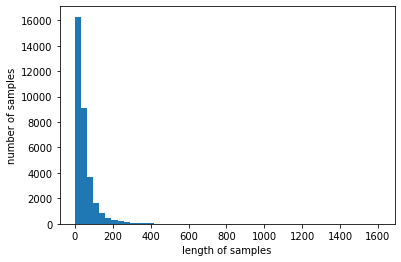

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 200, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
model.save('review_embed')

In [ ]:
model.save('/content/drive/MyDrive/NLP모델링/review_embed')

In [ ]:
model = Word2Vec.load('review_embed')

## 관련 단어 후보

In [ ]:
model.wv.most_similar("성적",topn=50)

[('학점', 0.8169288039207458),
 ('점수', 0.8088468909263611),
 ('에쁠', 0.6291245818138123),
 ('이쁘다', 0.5994227528572083),
 ('비쁠', 0.5929530262947083),
 ('쁠', 0.5845422148704529),
 ('결과', 0.5629949569702148),
 ('레터', 0.5506712198257446),
 ('마이너스', 0.5316295623779297),
 ('비율', 0.525033712387085),
 ('에이', 0.5208319425582886),
 ('커브', 0.4975059926509857),
 ('그레이드', 0.496021032333374),
 ('채점', 0.49411022663116455),
 ('에마', 0.46881091594696045),
 ('만점', 0.46592530608177185),
 ('씨쁠', 0.4496643543243408),
 ('평점', 0.4477028548717499),
 ('패스', 0.4373936057090759),
 ('최종', 0.4243316054344177),
 ('충격', 0.41986167430877686),
 ('퍼', 0.41956061124801636),
 ('마이너', 0.4183403253555298),
 ('제로', 0.41608479619026184),
 ('선언', 0.414339542388916),
 ('절평', 0.41388610005378723),
 ('평가', 0.411197692155838),
 ('노력', 0.411171555519104),
 ('늘다', 0.4039268493652344),
 ('플러스', 0.3991886377334595),
 ('등수', 0.3923153281211853),
 ('쁠몰', 0.38874340057373047),
 ('피드백', 0.3874778151512146),
 ('기준', 0.3874291181564331),
 ('박하

In [ ]:
model.wv.most_similar("학점",topn=50)

[('성적', 0.8169286251068115),
 ('점수', 0.6842225790023804),
 ('에쁠', 0.6393110752105713),
 ('쁠', 0.6105543375015259),
 ('이쁘다', 0.5804473161697388),
 ('마이너스', 0.5803384780883789),
 ('커브', 0.5488071441650391),
 ('비쁠', 0.5377268195152283),
 ('비율', 0.5369128584861755),
 ('에이', 0.489926815032959),
 ('쁠몰', 0.48308587074279785),
 ('패스', 0.4697057604789734),
 ('씨쁠', 0.46079277992248535),
 ('소문', 0.4389161765575409),
 ('평점', 0.4367934763431549),
 ('퍼', 0.43102362751960754),
 ('늘다', 0.43075400590896606),
 ('에마', 0.4226473569869995),
 ('레터', 0.42232421040534973),
 ('널', 0.41857755184173584),
 ('결과', 0.4168294072151184),
 ('절평', 0.4154064357280731),
 ('마이너', 0.4103018343448639),
 ('그레이드', 0.39876770973205566),
 ('확실하다', 0.39868608117103577),
 ('노력', 0.390442818403244),
 ('그렇다고', 0.38612449169158936),
 ('시진', 0.3827641010284424),
 ('제로', 0.3787478506565094),
 ('그럭저럭', 0.37188220024108887),
 ('만족', 0.3704151213169098),
 ('만족하다', 0.3690882921218872),
 ('플러스', 0.3636930584907532),
 ('다다', 0.3635937273502

In [ ]:
model.wv.most_similar("교수",topn=30)

[('조교', 0.6207523345947266),
 ('겨수', 0.5633945465087891),
 ('인자하다', 0.4549667537212372),
 ('젠틀', 0.4527760148048401),
 ('성품', 0.4366350769996643),
 ('온화하다', 0.4312793016433716),
 ('유쾌하다', 0.4194697141647339),
 ('귀엽다', 0.41778039932250977),
 ('스윗', 0.4158487915992737),
 ('천사', 0.4153100252151489),
 ('착하다', 0.413796067237854),
 ('위트', 0.4120141267776489),
 ('짱', 0.40486738085746765),
 ('박학', 0.40257343649864197),
 ('인품', 0.40250784158706665),
 ('선생님', 0.40067213773727417),
 ('강사', 0.4005287289619446),
 ('열정', 0.3939136862754822),
 ('친절', 0.39317458868026733),
 ('너무나', 0.39197301864624023),
 ('따뜻하다', 0.38947826623916626),
 ('사랑', 0.38733670115470886),
 ('훌륭하다', 0.3866877853870392),
 ('똑똑하다', 0.3835833966732025),
 ('멋있다', 0.3825908899307251),
 ('젊다', 0.3821083605289459),
 ('불다', 0.38210541009902954),
 ('목소리', 0.38055914640426636),
 ('선배', 0.37696224451065063),
 ('분임', 0.37403038144111633)]

In [ ]:
model.wv.most_similar("족보",topn=50)

[('기출', 0.727780818939209),
 ('똑같이', 0.663167417049408),
 ('똥줄', 0.6436376571655273),
 ('연플', 0.6182736158370972),
 ('구', 0.5849268436431885),
 ('교재', 0.5742166042327881),
 ('예상', 0.5573580265045166),
 ('유형', 0.5535040497779846),
 ('타다', 0.5453481674194336),
 ('버스', 0.5429125428199768),
 ('프셋', 0.5395644903182983),
 ('크루그먼', 0.5371395945549011),
 ('피피티', 0.527825117111206),
 ('그거', 0.5201759934425354),
 ('문제', 0.5191343426704407),
 ('절절', 0.5014926791191101),
 ('비슷하다', 0.5000771284103394),
 ('연습', 0.49809423089027405),
 ('구해', 0.4933374226093292),
 ('프린트', 0.49289995431900024),
 ('구매', 0.48829132318496704),
 ('맨큐', 0.4875358045101166),
 ('벼락치기', 0.48331204056739807),
 ('시험', 0.48313990235328674),
 ('안타', 0.48213350772857666),
 ('필기', 0.48197975754737854),
 ('몇개', 0.4807262718677521),
 ('답지', 0.48017171025276184),
 ('풀다', 0.47997939586639404),
 ('사서', 0.4795248806476593),
 ('겹', 0.47807973623275757),
 ('나오니', 0.4718690812587738),
 ('치면', 0.470890611410141),
 ('셤', 0.4708173871040344),
 

In [ ]:
model.wv.most_similar("피피티",topn=30)

[('프린트', 0.8430261611938477),
 ('교과서', 0.7881638407707214),
 ('교재', 0.7863940000534058),
 ('맨큐', 0.7474842071533203),
 ('필기', 0.7427184581756592),
 ('노트', 0.6874668598175049),
 ('슬라이드', 0.6797472238540649),
 ('자료', 0.6682844161987305),
 ('교안', 0.6507036089897156),
 ('판서', 0.6329469084739685),
 ('녹음', 0.6315057277679443),
 ('파일', 0.6301857829093933),
 ('리딩', 0.613839864730835),
 ('속기', 0.6116232872009277),
 ('글씨', 0.6025294065475464),
 ('본문', 0.5966726541519165),
 ('달달', 0.5965774059295654),
 ('기출', 0.5845757722854614),
 ('책', 0.5757083892822266),
 ('인터넷', 0.5744185447692871),
 ('정리', 0.5720043182373047),
 ('녹강', 0.5648742318153381),
 ('그래프', 0.5648549795150757),
 ('원서', 0.5636053085327148),
 ('테드', 0.5569485425949097),
 ('쭉', 0.5549404621124268),
 ('프셋', 0.5483475923538208),
 ('칠판', 0.5480148792266846),
 ('한자', 0.5461795926094055),
 ('크루그먼', 0.5437742471694946)]

In [ ]:
model.wv.most_similar("명강",topn=50)

[('꿀강', 0.874730110168457),
 ('헬강', 0.7998253107070923),
 ('꿀', 0.721397876739502),
 ('개꿀강', 0.7159361839294434),
 ('다행', 0.7128394246101379),
 ('띵강', 0.6455055475234985),
 ('헬', 0.6449785232543945),
 ('축복', 0.6347527503967285),
 ('최악', 0.6345890164375305),
 ('최고', 0.6286318302154541),
 ('교양과목', 0.6240896582603455),
 ('교양', 0.6191151142120361),
 ('연세대', 0.6125737428665161),
 ('세미나', 0.6055487394332886),
 ('연대', 0.5941265821456909),
 ('영강', 0.5889843702316284),
 ('종교인', 0.5882502794265747),
 ('소문', 0.5840368270874023),
 ('공대생', 0.5824630856513977),
 ('교직', 0.5802129507064819),
 ('행운', 0.5727545022964478),
 ('대학교', 0.5716375112533569),
 ('영문과', 0.5701190233230591),
 ('숨기다', 0.567001461982727),
 ('단언', 0.5668703317642212),
 ('대체재', 0.5625028610229492),
 ('이분', 0.5623111724853516),
 ('이자', 0.558753490447998),
 ('월릿', 0.5505366921424866),
 ('이만', 0.5497263073921204),
 ('부딪히다', 0.5440875291824341),
 ('장점', 0.541184663772583),
 ('알씨', 0.5407913327217102),
 ('가치', 0.538078784942627),
 ('흠', 0.

In [ ]:
model.wv.most_similar("가르치다",topn=50)

[('설명', 0.6212730407714844),
 ('이해도', 0.5170398354530334),
 ('배우다', 0.5164684057235718),
 ('알다', 0.4935363829135895),
 ('전달', 0.48288437724113464),
 ('이해', 0.47252216935157776),
 ('짚다', 0.4719387888908386),
 ('도와주다', 0.46592143177986145),
 ('보이다', 0.46421727538108826),
 ('들어주다', 0.46342721581459045),
 ('친절하다', 0.44771361351013184),
 ('되게', 0.4451862871646881),
 ('말씀', 0.43726053833961487),
 ('착하다', 0.4247440695762634),
 ('지적', 0.4225768744945526),
 ('물어보다', 0.4189542531967163),
 ('이끌다', 0.41723498702049255),
 ('요구', 0.4093672037124634),
 ('따라오다', 0.408894419670105),
 ('배려', 0.4058830738067627),
 ('강조', 0.40401262044906616),
 ('알차다', 0.4005826711654663),
 ('기울이다', 0.3974466919898987),
 ('열정', 0.3909551799297333),
 ('유용하다', 0.39042800664901733),
 ('차근차근', 0.3860914707183838),
 ('뭔가', 0.38175082206726074),
 ('해심', 0.3814811706542969),
 ('사소하다', 0.3807261884212494),
 ('느껴지다', 0.38022851943969727),
 ('안다', 0.3780428171157837),
 ('인상', 0.3748542070388794),
 ('인간미', 0.374630331993103),
 ('귀',

In [ ]:
model.wv.most_similar("이해",topn=50)

[('이해도', 0.6716911792755127),
 ('파악', 0.639298141002655),
 ('따라가다', 0.6157433986663818),
 ('집중', 0.6004863977432251),
 ('설명', 0.5991541147232056),
 ('숙지', 0.5317450761795044),
 ('알아보다', 0.5196672081947327),
 ('커버', 0.5193807482719421),
 ('알아듣다', 0.5132816433906555),
 ('반복', 0.5112403631210327),
 ('넘어가다', 0.5097368955612183),
 ('전달', 0.507297933101654),
 ('판서', 0.4983004927635193),
 ('납득', 0.4978986084461212),
 ('정리', 0.48883241415023804),
 ('가르치다', 0.472522109746933),
 ('핵심', 0.4692060351371765),
 ('알', 0.4673402011394501),
 ('해결', 0.45857471227645874),
 ('사용', 0.45545029640197754),
 ('제공', 0.45345956087112427),
 ('캐치', 0.4522362947463989),
 ('복습', 0.4518565535545349),
 ('짚다', 0.4437466859817505),
 ('따라오다', 0.4407382905483246),
 ('의식', 0.4403635263442993),
 ('적응', 0.4381583631038666),
 ('연결', 0.437224805355072),
 ('흐름', 0.4304606020450592),
 ('감당', 0.4238995313644409),
 ('구분', 0.42349374294281006),
 ('제대로', 0.42200055718421936),
 ('출제', 0.4135868549346924),
 ('한국어', 0.4122616946697235)

In [ ]:
model.wv.most_similar("공부량",topn=50)

[('양은', 0.7722899913787842),
 ('로드', 0.767160952091217),
 ('제량', 0.720085859298706),
 ('양도', 0.713828444480896),
 ('양', 0.6972833871841431),
 ('치고는', 0.6609630584716797),
 ('기량', 0.6450175046920776),
 ('습량', 0.629967987537384),
 ('량', 0.6056463718414307),
 ('편도', 0.5946335792541504),
 ('비다', 0.5878234505653381),
 ('전공', 0.575007438659668),
 ('인기', 0.5643014311790466),
 ('프라', 0.563668966293335),
 ('학러', 0.5599004030227661),
 ('과목', 0.5519627332687378),
 ('경쟁률', 0.5434715747833252),
 ('결코', 0.5386770963668823),
 ('범위', 0.5381178855895996),
 ('체감', 0.5351312160491943),
 ('교양과목', 0.5339829921722412),
 ('월릿', 0.5332613587379456),
 ('교직', 0.5306640863418579),
 ('빡센', 0.5305027961730957),
 ('치고', 0.5146237015724182),
 ('장벽', 0.5001505613327026),
 ('교양', 0.4955184757709503),
 ('단위', 0.4944898188114166),
 ('난이도', 0.48781487345695496),
 ('얄짤', 0.4835176169872284),
 ('글빨', 0.4776419997215271),
 ('메리트', 0.4769650101661682),
 ('양학당', 0.47668448090553284),
 ('공대생', 0.4751855134963989),
 ('점퍼', 0.47

In [ ]:
model.wv.most_similar("시간",topn=50)

[('오래', 0.5593563318252563),
 ('일주일', 0.5331661701202393),
 ('쉬는시간', 0.5259230732917786),
 ('일찍', 0.5248161554336548),
 ('하루', 0.5065226554870605),
 ('매일', 0.49755561351776123),
 ('날', 0.4885879456996918),
 ('끝내다', 0.4642484784126282),
 ('휴식', 0.452039897441864),
 ('주일', 0.4519602060317993),
 ('매번', 0.44832971692085266),
 ('기간', 0.44645512104034424),
 ('손', 0.4453023672103882),
 ('실습', 0.44484609365463257),
 ('끝내주다', 0.4337289333343506),
 ('아침', 0.43281233310699463),
 ('날때', 0.4272569417953491),
 ('기한', 0.4224335253238678),
 ('길다', 0.4166024923324585),
 ('연강', 0.41253527998924255),
 ('실시간', 0.41231870651245117),
 ('분만', 0.41092634201049805),
 ('꽉', 0.40875017642974854),
 ('줌', 0.40496620535850525),
 ('끝나다', 0.40180689096450806),
 ('보충', 0.3911725878715515),
 ('걸리다', 0.3895031213760376),
 ('빨리', 0.38838836550712585),
 ('막상', 0.3850270211696625),
 ('그날', 0.3842464089393616),
 ('마다', 0.3798421621322632),
 ('분량', 0.3744051456451416),
 ('딴', 0.37297001481056213),
 ('며칠', 0.3718978762626648)

In [ ]:
model.wv.most_similar("과제",topn=50)

[('숙제', 0.7150648832321167),
 ('보고서', 0.6699627637863159),
 ('레포트', 0.6638969779014587),
 ('페이퍼', 0.6638363599777222),
 ('퀴즈', 0.6465657949447632),
 ('쪽글', 0.6177982091903687),
 ('프로젝트', 0.608052134513855),
 ('에세이', 0.6026273369789124),
 ('내야', 0.5954036712646484),
 ('파이널', 0.5785332322120667),
 ('팀플', 0.5716046094894409),
 ('분량', 0.5552628040313721),
 ('대신', 0.5505994558334351),
 ('리포트', 0.529062032699585),
 ('감상문', 0.5269719958305359),
 ('자잘하다', 0.5243831872940063),
 ('텀', 0.5236670970916748),
 ('쪽지', 0.5138322710990906),
 ('활동', 0.5137099623680115),
 ('발표', 0.512656033039093),
 ('리딩', 0.510623574256897),
 ('독후감', 0.5075399875640869),
 ('포트폴리오', 0.5017385482788086),
 ('기한', 0.48710891604423523),
 ('간단하다', 0.4709565043449402),
 ('매주', 0.4642999768257141),
 ('서평', 0.45910966396331787),
 ('페이지', 0.45419424772262573),
 ('제량', 0.4482612907886505),
 ('마지막', 0.44464337825775146),
 ('귀찮다', 0.44375723600387573),
 ('짧다', 0.44263380765914917),
 ('클리', 0.44256389141082764),
 ('내주다', 0.4396716952

In [ ]:
model.wv.most_similar("로드",topn=50)

[('공부량', 0.767160952091217),
 ('제량', 0.7602216005325317),
 ('양은', 0.7108308672904968),
 ('워', 0.688228964805603),
 ('양도', 0.6644039750099182),
 ('부담', 0.5865466594696045),
 ('치고는', 0.561401903629303),
 ('무리다', 0.5562745332717896),
 ('비중', 0.5322878360748291),
 ('메리트', 0.5250387191772461),
 ('어려움', 0.5149931311607361),
 ('빡센', 0.5092376470565796),
 ('양', 0.5078935623168945),
 ('장점', 0.5043041706085205),
 ('편이', 0.4876517355442047),
 ('패논패', 0.4826723337173462),
 ('감다', 0.48072701692581177),
 ('불만', 0.4748431444168091),
 ('치고', 0.47375500202178955),
 ('디스', 0.473686546087265),
 ('지장', 0.4717780351638794),
 ('인원', 0.4586602449417114),
 ('비다', 0.4571675658226013),
 ('무리', 0.45600995421409607),
 ('팀플', 0.45582315325737),
 ('인기', 0.45535486936569214),
 ('단점', 0.45428749918937683),
 ('결코', 0.4501120448112488),
 ('편도', 0.4440027177333832),
 ('한데', 0.44107577204704285),
 ('펴다', 0.4367985725402832),
 ('영향', 0.43658897280693054),
 ('량', 0.43624794483184814),
 ('그렇지만', 0.4332861304283142),
 ('빈도',

In [ ]:
model.wv.most_similar("성격",topn=100)

[('성품', 0.8291995525360107),
 ('인자하다', 0.8280677795410156),
 ('인품', 0.8269382119178772),
 ('유쾌하다', 0.8182689547538757),
 ('인성', 0.7993606925010681),
 ('박학', 0.7303439378738403),
 ('착하다', 0.727034330368042),
 ('인간미', 0.7250829935073853),
 ('유머', 0.7200031876564026),
 ('귀엽다', 0.7155359983444214),
 ('젊다', 0.7154077291488647),
 ('젠틀', 0.7118861079216003),
 ('온화하다', 0.6944136619567871),
 ('존경', 0.691708505153656),
 ('매력', 0.6827663779258728),
 ('께서는', 0.6814121007919312),
 ('딕션', 0.6787062883377075),
 ('나긋나긋하다', 0.6774064302444458),
 ('스윗', 0.6760129928588867),
 ('잘생기다', 0.6759722828865051),
 ('자상하다', 0.675642192363739),
 ('다식', 0.6746492385864258),
 ('위트', 0.6711017489433289),
 ('유머러스하다', 0.6675574779510498),
 ('학식', 0.6655018925666809),
 ('상냥하다', 0.6653115749359131),
 ('멋있다', 0.6650089025497437),
 ('멋지다', 0.6596890687942505),
 ('짱', 0.6554391384124756),
 ('분임', 0.6507240533828735),
 ('목소리', 0.6478543281555176),
 ('모노', 0.6448470950126648),
 ('선하다', 0.6416020393371582),
 ('이시고', 0.64138442

In [ ]:
word2vec_model.wv.most_similar("성적")

[('성욕', 0.5703407526016235),
 ('쾌감', 0.5564484596252441),
 ('정서적', 0.517047643661499),
 ('경기력', 0.5108000636100769),
 ('학업', 0.5107922554016113),
 ('감정', 0.5063415765762329),
 ('신체적', 0.5047537088394165),
 ('부진', 0.4976061284542084),
 ('승률', 0.48968732357025146),
 ('몰입', 0.4848536252975464)]

In [ ]:
word2vec_model.wv.most_similar("교수")

[('부교수', 0.740249752998352),
 ('강사', 0.7384446263313293),
 ('조교수', 0.7132934331893921),
 ('학장', 0.6979707479476929),
 ('정교수', 0.6876888871192932),
 ('박사', 0.6674391031265259),
 ('사학과', 0.6012394428253174),
 ('대학장', 0.5837344527244568),
 ('전공의', 0.5738457441329956),
 ('의대', 0.56751948595047)]

In [ ]:
model.wv.similarity('교수', '성격')

0.35645327

In [ ]:
word2vec_model.wv.similarity('교수', '성격')

-0.12974358

In [ ]:
model.wv.similarity('교수', '배려')

0.23746756